<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/WhatsApp_Chat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install emoji
!pip install regex

In [6]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [8]:
data = []
conversation = '/content/WhatsApp Chat with Family🥳.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [9]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

            Date   Time         Author  \
17806 2025-01-24  07:30   Mimmifyuh🤩😍😍   
17807 2025-01-24  07:42      Mukul Raj   
17808 2025-01-24  08:03    Dudifyuh🥳🎉🎊   
17809 2025-01-24  08:03    Dudifyuh🥳🎉🎊   
17810 2025-01-24  08:04      Mukul Raj   
17811 2025-01-24  08:43   Mimmifyuh🤩😍😍   
17812 2025-01-24  09:20   Mimmifyuh🤩😍😍   
17813 2025-01-24  09:22    Dudifyuh🥳🎉🎊   
17814 2025-01-24  09:22    Dudifyuh🥳🎉🎊   
17815 2025-01-24  09:26      Mukul Raj   
17816 2025-01-24  09:27   Mimmifyuh🤩😍😍   
17817 2025-01-24  09:27      Mukul Raj   
17818 2025-01-24  09:27   Mimmifyuh🤩😍😍   
17819 2025-01-24  09:46    Dudifyuh🥳🎉🎊   
17820 2025-01-24  09:47   Mimmifyuh🤩😍😍   
17821 2025-01-24  09:57  Rakuzziiiiiii   
17822 2025-01-24  10:06   Mimmifyuh🤩😍😍   
17823 2025-01-24  10:27    Dudifyuh🥳🎉🎊   
17824 2025-01-24  11:07    Dudifyuh🥳🎉🎊   
17825 2025-01-24  12:01   Mimmifyuh🤩😍😍   

                                                 Message  
17806                                     Mukul Start...  

<ipython-input-9-66e13cebf647>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
total_messages = df.shape[0]
print(total_messages)

17826


In [11]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

6133


In [12]:
!pip install emoji==2.2.0 # install specific version

import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word): # Use emoji.EMOJI_DATA instead of emoji.UNICODE_EMOJI
            emoji_list.append(word)
    return emoji_list
# After ipython-input-7-daa74fc9469e
import pickle
with open('whatsapp_data.pkl', 'wb') as f:
    pickle.dump(data, f)

# In ipython-input-3-daa74fc9469e instead of the line data=[]
import pickle
with open('whatsapp_data.pkl', 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['emoji'] = df["Message"].apply(split_count)


In [16]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Mimmifyu and Rakuzzzzi")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emoji)
print("Number of Links Shared", links)

Chats between Mimmifyu and Rakuzzzzi
Total Messages:  17826
Number of Media Shared:  6133
Number of Emojis Shared <module 'emoji' from '/usr/local/lib/python3.11/dist-packages/emoji/__init__.py'>
Number of Links Shared 507


In [17]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Mimmifyu", "Rakuzzzzzi"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)

Stats of Mimmifyu -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0
Stats of Rakuzzzzzi -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


<ipython-input-17-a9a461ff8123>:16: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
<ipython-input-17-a9a461ff8123>:16: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [18]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('🥳', 1908)
('😍', 493)
('😘', 473)
('👍🏻', 359)
('😂', 351)
('🤩', 293)
('👌🏻', 256)
('🎉', 230)
('🎊', 209)
('👏🏻', 209)
('🙏🏻', 187)
('👍🏼', 175)
('🤣', 154)
('😉', 133)
('😆', 114)
('😀', 113)
('👍', 86)
('😝', 74)
('😁', 73)
('🙏', 72)
('😏', 59)
('👏', 45)
('🔥', 40)
('❤️', 34)
('🤔', 32)
('👀', 29)
('👌', 29)
('😒', 28)
('😊', 28)
('🥰', 26)
('✌🏻', 23)
('⚪', 22)
('🤭', 21)
('🤝', 19)
('👊🏻', 18)
('✨', 17)
('🎂', 15)
('😴', 15)
('😌', 14)
('🌹', 13)
('👆🏻', 13)
('💐', 12)
('🙃', 11)
('😟', 11)
('😭', 11)
('🍿', 10)
('🙌🏻', 10)
('🌧', 8)
('😋', 8)
('🤷🏻\u200d♂️', 7)
('😡', 7)
('🫡', 7)
('🤪', 7)
('😃', 6)
('💯', 6)
('🖕', 5)
('🐒', 5)
('🥹', 5)
('🙋🏻\u200d♂️', 5)
('❤\u200d🔥', 5)
('🍫', 5)
('🍪', 5)
('🔺', 5)
('🙄', 4)
('🤦🏻\u200d♂️', 4)
('🌼', 4)
('😔', 3)
('🙏🏼', 3)
('👋', 3)
('🙀', 3)
('💃', 3)
('💃🏻', 3)
('💪', 3)
('⛈️', 3)
('🦚', 3)
('🥛', 3)
('🥶', 3)
('🫂', 3)
('😞', 3)
('😚', 3)
('👇🏻', 2)
('😲', 2)
('😳', 2)
('☔', 2)
('🥲', 2)
('😠', 2)
('❤', 2)
('😜', 2)
('🌺', 2)
('🍁', 2)
('🌷', 2)
('👆🏽', 2)
('😎', 2)
('👧', 2)
('😅', 2)
('🌨️', 2)
('🙌', 2)
('🍰', 2)
('🌸'

There are 286178 words in all the messages.


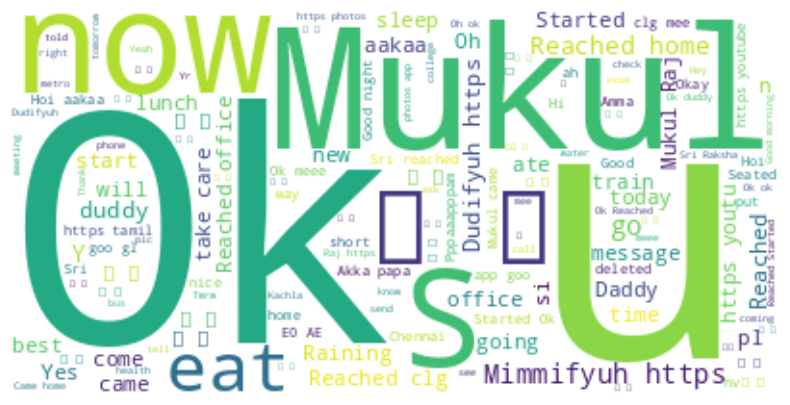

In [19]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

l = ["Mimmifyu", "Rakuzzzzzi"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)

    # 1. Customize stopwords: Remove or add words as needed
    stop_words = set(stopwords.words('english'))  # Use NLTK stopwords
    # Add or remove specific words
    stop_words.update(['<Media', 'omitted>', 'https', 'www']) # remove common words or phrases
    stop_words.discard('not') # Keep words if needed

    # 2. Process text: Remove URLs, punctuation, and lowercase
    text = regex.sub(r'http\S+', '', text) # Remove URLs
    text = regex.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()

    # 3. Check for empty text:
    text_without_stopwords = " ".join([word for word in text.split() if word not in stop_words])
    if not text_without_stopwords:
        print(f"No words left for word cloud for author: {l[i]}")
        continue

    # Generate and display word cloud
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text_without_stopwords)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

No words left for word cloud for author: Mimmifyu
No words left for word cloud for author: Rakuzzzzzi


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
